# Project:The Movies database analysis

<a id='intro'></a>
## Introduction
##### Nous avons un dataset comportant les données de films (The movies database)
##### Nous allons grâce à l'analyse et le nettoyage des données, repondre à des questions specifiques.
##### Quel est le genre le plus populaire de tous les temps de données ?
##### Quel est le film le plus connu de tous les temps ?
##### Quel sont les données associées aux films au plus grand revenus ?


### Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

<hr /><hr />
<h1 style="color:black; font-style:italic; font-weight:500;" id="gathering">Gathering data</h1>
<h3>In this step we are going to gather the movies data</h3>
<hr /><hr />

In [2]:
# Récupération des données
df_movies = pd.read_csv('tmdb-movies.csv')

<hr /><hr />
<h1 style="color:black; font-style:italic; font-weight:500;" id="assessment">Accessing Data</h1>
<hr /><hr />

In [3]:
# Appercu des données
df_movies.sample(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1895,281979,tt1413314,0.056777,0,0,Doctor Who: The Waters of Mars,David Tennant,NaN,NaN,NaN,...,The Doctor joins forces with his oldest compan...,62,Science Fiction|Adventure|Family,BBC Wales,12/19/09,25,8.0,2009,0.0,0.0
3769,63197,tt1087461,0.216060,0,0,Megan is Missing,Amber Perkins|Rachel Quinn|Dean Waite|Jael Eli...,http://www.meganismissing.com,Michael Goi,Megan and Amy are best friends. They share sec...,...,"Fictional drama based on actual events, about ...",85,Drama|Horror|Mystery|Thriller,NaN,5/1/11,32,5.6,2011,0.0,0.0


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<h3>There are many useless columns</h3>

In [5]:
# Appercu des données non utiles
df_movies[['id','imdb_id','homepage','tagline','overview','keywords']].sample(2)

,id,imdb_id,homepage,tagline,overview,keywords
1217,409696,tt3718778,NaN,NaN,Two brothers find themselves lost in a mysteri...,NaN
2652,4133,tt0221027,NaN,Based on a True Story.,A boy named George Jung grows up in a struggli...,1970s|war on drugs|drug addiction|drug traffic...


<h3>There are many null value</h3>

In [6]:
# Voyons les colonnes avec les valeurs nulles
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<h3>release_date is not at good format</h3>

In [7]:
# Format de la colonne release_date
df_movies.release_date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10866 entries, 0 to 10865
Series name: release_date
Non-Null Count  Dtype 
--------------  ----- 
10866 non-null  object
dtypes: object(1)
memory usage: 85.0+ KB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

<hr /><hr />
<h1 style="color:black; font-style:italic; font-weight:500;" id="assessment">Cleanning Data</h1>
<hr /><hr />

<h3>There are many useless columns</h3>

<p><b>Define</b></p>
<p>Let remove useless columns</p>

<p><b>Cleaning</b></p>

In [8]:
def drop_column(dataframe,columns):
    for column in columns:
        return dataframe.drop([column],axis=1,inplace=True)
    
drop_column(df_movies,['id','imdb_id','homepage','tagline','overview','keywords'])

<p><b>Test</b></p>

In [9]:
df_movies.columns.tolist()

['imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

<h3>There are many null value</h3>

<p><b>Define</b></p>
<p>Let remove null values</p>

<p><b>Cleaning</b></p>

In [10]:
df_movies.dropna(inplace=True)

<p><b>Test</b></p>

In [11]:
df_movies.isnull().sum()

imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<h3>release_date is not at good format</h3>

<p><b>Define</b></p>
<p>Let turn release_date into good format</p>

<p><b>Cleaning</b></p>

In [12]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies['release_year'] = df_movies['release_date'].dt.year

<p><b>Test</b></p>

In [13]:
df_movies.release_date.info()

<class 'pandas.core.series.Series'>
Int64Index: 1992 entries, 0 to 10819
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
1992 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 31.1 KB


<hr /><hr />
<h1 style="color:black; font-style:italic; font-weight:500;" id="assessment">Data Visualization</h1>
<hr /><hr />

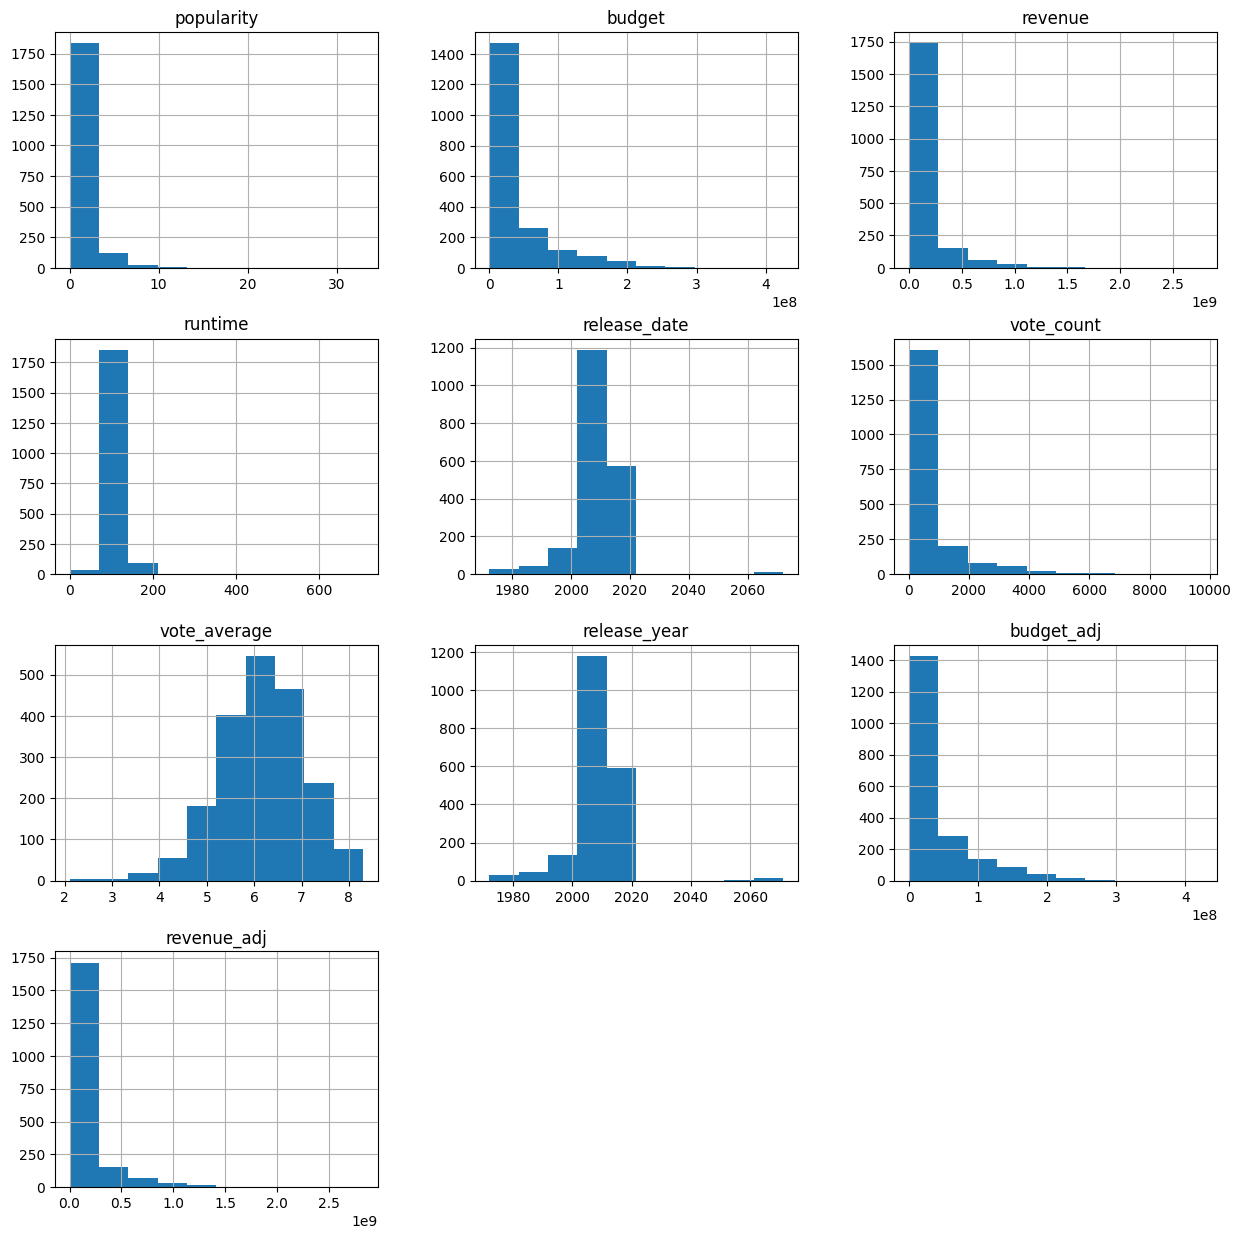

In [14]:
df_movies.hist(figsize=(15,15));

In [15]:
df_movies.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_id               1992 non-null   object        
 1   popularity            1992 non-null   float64       
 2   budget                1992 non-null   int64         
 3   revenue               1992 non-null   int64         
 4   original_title        1992 non-null   object        
 5   cast                  1992 non-null   object        
 6   homepage              1992 non-null   object        
 7   director              1992 non-null   object        
 8   tagline               1992 non-null   object        
 9   keywords              1992 non-null   object        
 10  overview              1992 non-null   object        
 11  runtime               1992 non-null   int64         
 12  genres                1992 non-null   object        
 13  production_compan

# Quel est le genres le plus populaire sur toutes les années ?

In [16]:
# La colonne genre contient par cellules plusieurs genres
# Nous allons essayer d'avoir un seul genre par cellule

df_genres = df_movies.genres.str.split('|').apply(pd.Series)
df_genres.index = df_movies.set_index(['popularity','budget','revenue','original_title','cast','director','runtime','production_companies','release_date','vote_count','vote_average','release_year','budget_adj','revenue_adj']).index
new_df_moovies = df_genres.stack().reset_index(['popularity','budget','revenue','original_title','cast','director','runtime','production_companies','release_date','vote_count','vote_average','release_year','budget_adj','revenue_adj'])
#new_df_moovies
new_df_moovies.columns = [*new_df_moovies.columns[:-1], 'genres']
#new_df_moovies
new_df_moovies.sample(3)

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,0.458932,17000000,20455276,My Life in Ruins,Nia Vardalos|Richard Dreyfuss|Alexis Georgouli...,Donald Petrie,95,Fox Searchlight Pictures|26 Films,2009-02-06,56,5.7,2009,1.727881e+07,2.079075e+07,Comedy
0,0.242078,1500000,0,Narcopolis,Elliot Cowan|Elodie Yung|Jonathan Pryce|Robert...,Justin Trefgarne,96,T Squared Film,2015-09-25,20,4.4,2015,1.379999e+06,0.000000e+00,Thriller
2,0.919730,14350531,3964682,Attack the Block,Nick Frost|Jodie Whittaker|John Boyega|Luke Tr...,Joe Cornish,88,UK Film Council|Studio Canal|Film4,2011-05-12,427,6.4,2011,1.391138e+07,3.843355e+06,Science Fiction


In [17]:
len(pd.unique(new_df_moovies['genres']))

20

In [18]:
new_df_moovies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5123.000000,5.123000e+03,5.123000e+03,5123.000000,5123.000000,5123.000000,5123.000000,5.123000e+03,5.123000e+03
mean,1.466109,4.084584e+07,1.352195e+08,106.454031,740.526059,6.176635,2008.226235,4.285440e+07,1.524784e+08
std,2.092849,5.535222e+07,2.438112e+08,30.644126,1192.315220,0.875382,8.601812,5.581630e+07,2.806311e+08
min,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1972.000000,0.000000e+00,0.000000e+00
25%,0.423160,7.500000e+01,0.000000e+00,93.000000,61.500000,5.700000,2006.000000,8.243377e+01,0.000000e+00
50%,0.847636,1.900000e+07,3.323126e+07,102.000000,255.000000,6.200000,2010.000000,2.032801e+07,3.564366e+07
75%,1.752987,6.000000e+07,1.555453e+08,116.000000,835.500000,6.800000,2012.000000,6.310011e+07,1.735719e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2071.000000,4.250000e+08,2.827124e+09


In [19]:
df_most_popular = new_df_moovies.query("vote_count > 196.0 and vote_average > 5.96")
df_most_popular.groupby(['genres']).count().sort_values(by=['popularity'],ascending=False)

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,,,,,,
Drama,326,326,326,326,326,326,326,326,326,326,326,326,326,326
Action,251,251,251,251,251,251,251,251,251,251,251,251,251,251
Thriller,233,233,233,233,233,233,233,233,233,233,233,233,233,233
Comedy,215,215,215,215,215,215,215,215,215,215,215,215,215,215
Adventure,198,198,198,198,198,198,198,198,198,198,198,198,198,198
Science Fiction,133,133,133,133,133,133,133,133,133,133,133,133,133,133
Crime,122,122,122,122,122,122,122,122,122,122,122,122,122,122
Romance,114,114,114,114,114,114,114,114,114,114,114,114,114,114
Family,105,105,105,105,105,105,105,105,105,105,105,105,105,105


Text(0.5, 1.0, 'Le genre de film le plus populaire')

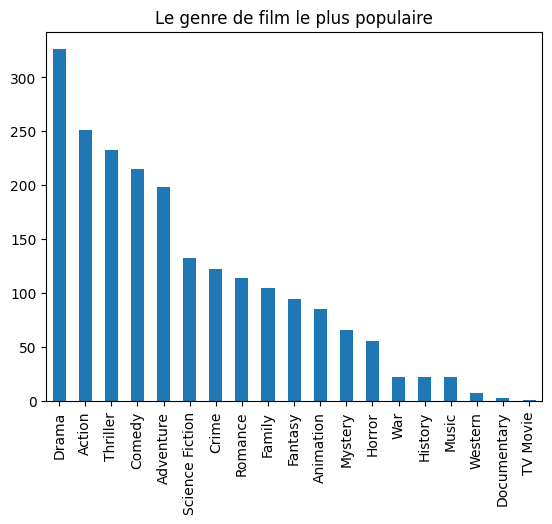

In [20]:
# Diagramme en barre des genres de films les plus populaire
df_most_popular["genres"].value_counts().plot(kind='bar')
plt.title('Le genre de film le plus populaire')

Text(0.5, 1.0, 'Le genre de film le plus populaire')

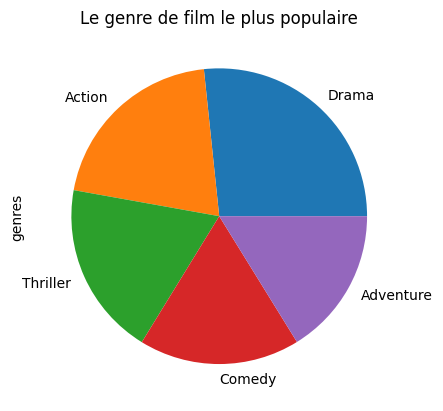

In [21]:
# Diagramme en camembert des genres de films les plus populaire
df_most_popular["genres"].value_counts(normalize=True).head().plot(kind='pie')
plt.title('Le genre de film le plus populaire')

#### Réponse
### Le genre de film le plus populaire au fil des années est le genre "DRAME"

# Quel est le film le plus connu de tous les temps ?

In [22]:
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2008.449297,3.627376e+07,1.302391e+08
std,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,8.269351,5.129783e+07,2.564338e+08
min,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1972.000000,0.000000e+00,0.000000e+00
25%,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2007.000000,0.000000e+00,0.000000e+00
50%,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2071.000000,4.250000e+08,2.827124e+09


In [23]:
# Nous allons trouver le film le plus populaire parmi les films qui ont un nombre de vote assez conséquent 
df_movies.query("vote_count > 46.0 and vote_average > 6").sort_values(by=['popularity'],ascending=False).head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


#### Réponse 
### Le film le plus populaire de tous les temps est Jurassic World

# Quel sont les données associées aux films au plus grand revenus ?

array([[<AxesSubplot: title={'center': 'popularity'}>,
        <AxesSubplot: title={'center': 'budget'}>,
        <AxesSubplot: title={'center': 'revenue'}>],
       [<AxesSubplot: title={'center': 'runtime'}>,
        <AxesSubplot: title={'center': 'release_date'}>,
        <AxesSubplot: title={'center': 'vote_count'}>],
       [<AxesSubplot: title={'center': 'vote_average'}>,
        <AxesSubplot: title={'center': 'release_year'}>,
        <AxesSubplot: title={'center': 'budget_adj'}>],
       [<AxesSubplot: title={'center': 'revenue_adj'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

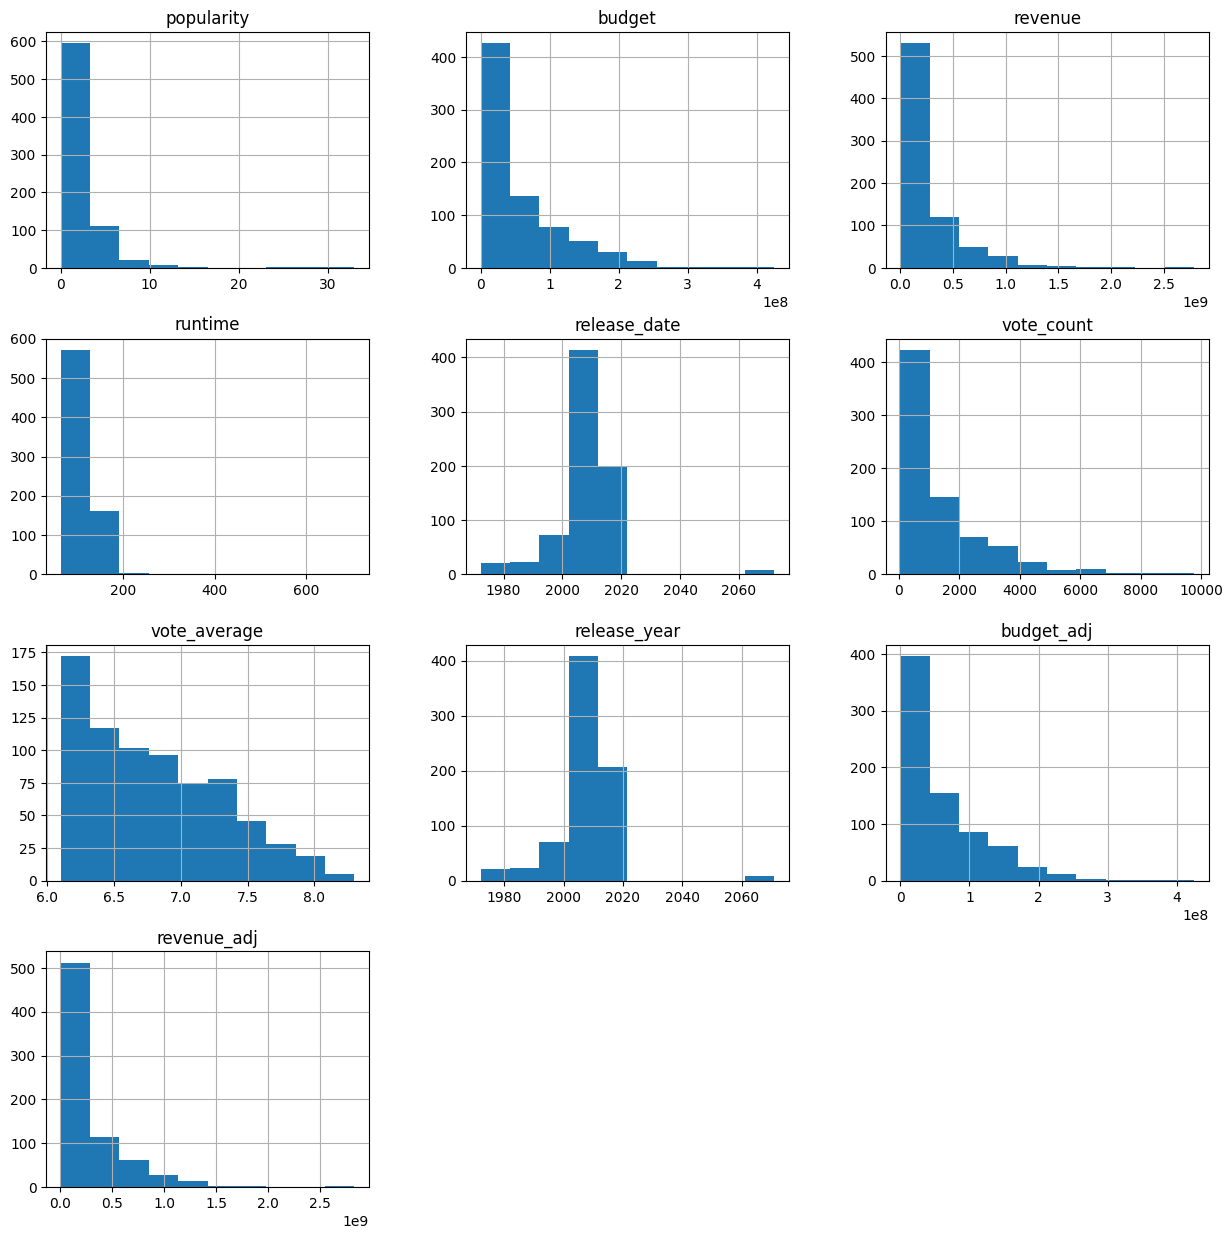

In [24]:
df = df_movies.query("revenue > 4422678 and vote_count > 46.0 and vote_average > 6").sort_values(by=['popularity'],ascending=False)
df.hist(figsize=(15,15))

In [25]:
#Corrélation entre les variable numérique du dataset
df_movies.corr()

C:\Users\Issa\AppData\Local\Temp\ipykernel_6028\1220980372.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_movies.corr()


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.513553,0.641346,0.220787,0.774226,0.298066,0.008831,0.504971,0.600277
budget,0.513553,1.000000,0.747273,0.269480,0.649130,0.118651,0.014908,0.988433,0.630719
revenue,0.641346,0.747273,1.000000,0.257756,0.804788,0.258208,-0.048669,0.752853,0.925494
runtime,0.220787,0.269480,0.257756,1.000000,0.280602,0.243699,-0.054343,0.282257,0.257378
vote_count,0.774226,0.649130,0.804788,0.280602,1.000000,0.379345,-0.021535,0.642077,0.741541
vote_average,0.298066,0.118651,0.258208,0.243699,0.379345,1.000000,-0.097134,0.128789,0.274923
release_year,0.008831,0.014908,-0.048669,-0.054343,-0.021535,-0.097134,1.000000,-0.042614,-0.136577
budget_adj,0.504971,0.988433,0.752853,0.282257,0.642077,0.128789,-0.042614,1.000000,0.669152
revenue_adj,0.600277,0.630719,0.925494,0.257378,0.741541,0.274923,-0.136577,0.669152,1.000000


In [26]:
import seaborn as sns

In [31]:
def showRegPlot(dataframe,xaxis,yaxis,title):
    sns.regplot(x=dataframe[xaxis],y=dataframe[yaxis])
    plt.title(title)
    plt.show()  

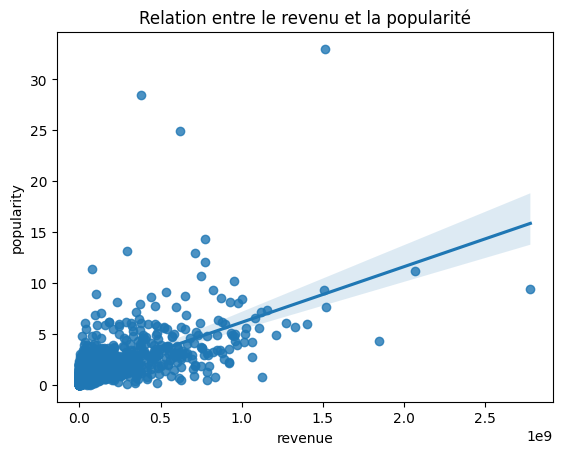

In [32]:
showRegPlot(df_movies,'revenue','popularity', 'Relation entre le revenu et la popularité')

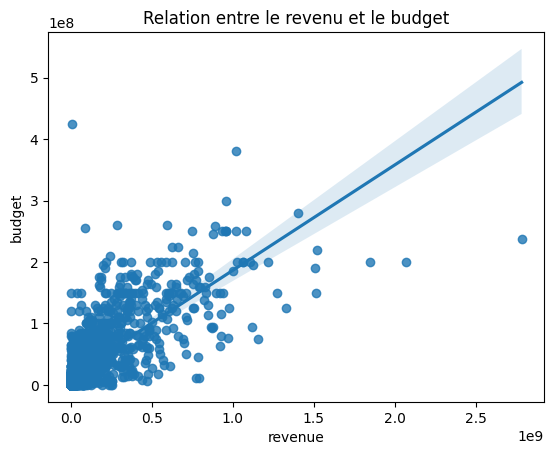

In [33]:
showRegPlot(df_movies,'revenue','budget', 'Relation entre le revenu et le budget')

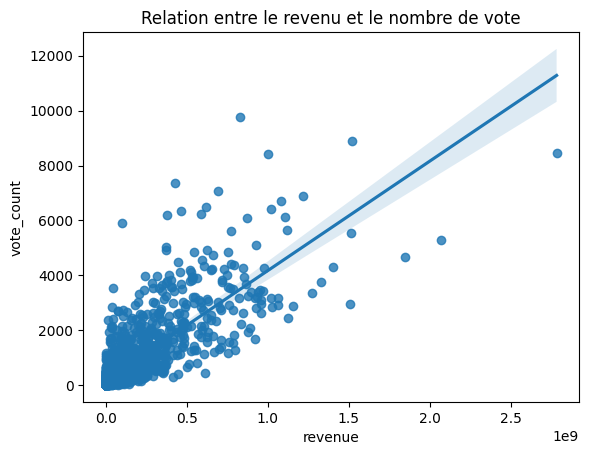

In [34]:
showRegPlot(df_movies,'revenue','vote_count', 'Relation entre le revenu et le nombre de vote')

#### Réponse
### Les données qui sont associées au films aux plus gros revenues sont: le nombre de vote, le budget et la popularité

# Conclusion finale

## Limitations
#### Lors de l'analyse nous avons rencontré des problèmes comme:  
##### - des valeurs nulles, 
##### - des colonnes inutiles à l'analyse
##### - le mauvais format de colonne


#### Après le nettoyage des données, nous avons pu relever le genre de film le plus populaire au cours des années: Le genre DRAME
#### On a aussi purelever comme le film le plus populaire : Jurassic World
#### On a pu au final trouvé les variables qui correspondent aux films aux plus gros revenu. On constate que ces variables sont: le nombre de vote, le budget et la popularité